In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Generate signal

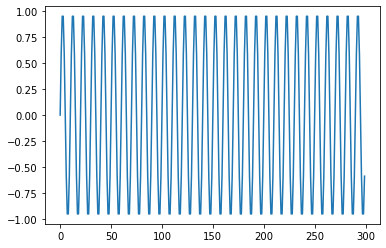

In [13]:
x = np.arange(300)
signal = np.sin(x / 10 * np.pi * 2)

plt.plot(x, signal)

### Step 2: Noise the signal

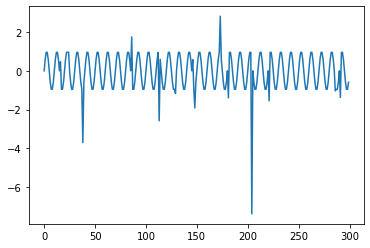

In [16]:
noised_signal = signal * ((np.random.rand(300) < 0.05) * (np.random.randn(300) * 5) + 1)

plt.plot(x, noised_signal)

### Step 3: Implement filter

In [17]:
def percentile_filter(noised_signal, period, low_percentile, high_percentile):

    n_periods = int(noised_signal.shape[0] / period)
    ss = noised_signal[:int(n_periods * period)].reshape(-1, period)

    ss_low = np.array([np.percentile(ss[:,i], low_percentile) for i in range(period)])
    ss_high = np.array([np.percentile(ss[:,i], high_percentile) for i in range(period)])

    where_lower = ss < ss_low
    where_in_bounds = np.logical_and(ss >= ss_low, ss <= ss_high)
    where_higher = ss > ss_high

    ss_filtered = where_lower * ss_low + where_in_bounds * ss + where_higher * ss_high

    filtered = ss_filtered.reshape(-1)
    
    return filtered

### Step 4: Filter the signal

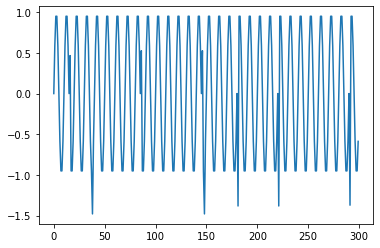

In [19]:
filtered = percentile_filter(noised_signal, period=10, low_percentile=5, high_percentile=95)

plt.plot(x, filtered)